In [4]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats

In [5]:
# Read our data file the pandas library
file_path = Path("Resources/proj_4_feat_target_var_set.csv")
data = pd.read_csv(file_path)

# Display sample data
data.head()


,fips_code,state_id,state_name,year,niaaa_pop_21_plus,census_total_pop,census_percent_pop_21_plus,census_percent_pop_18_24,census_percent_pop_25_34,census_percent_pop_35_44,...,tpc_state_beer_tax_rates_dollar_gal,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
0,1,AL,Alabama,2010,3439923,4785298,0.716,0.102,0.126,0.130,...,1.05,162068.8,148862.1,33849,31091,40474,101835000,29.60,NaN,NaN
1,2,AK,Alaska,2010,494781,713985,0.692,0.105,0.145,0.131,...,1.07,35374.3,32703.9,49543,45803,64576,15476350,31.28,NaN,NaN
2,4,AZ,Arizona,2010,4496526,6413737,0.702,0.099,0.134,0.128,...,0.16,216223.6,198815.2,33774,31055,46789,140015325,31.14,NaN,NaN
3,5,AR,Arkansas,2010,2082760,2921606,0.710,0.100,0.126,0.127,...,0.24,94127.0,86387.0,32218,29569,38307,53429000,25.65,NaN,NaN
4,6,CA,California,2010,26311028,37349363,0.704,0.106,0.143,0.139,...,0.20,1609997.5,1431825.6,43138,38364,57708,651673303,24.77,NaN,NaN


In [12]:
sample_data = data['niaaa_total_beer_vol_consumed_gallons']

# Calculate sample statistics
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Choose confidence level
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calulate standard error
standard_error = sample_std / (sample_size ** 0.5)

# Calculate margin of error
margin_of_error = critical_value * standard_error

# Calculate lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Add lower and upper bounds to a new column in the DataFrame

data['Lower Bound'] = lower_bound
data['Upper Bound'] = upper_bound

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
data.head()

Lower Bound: 114477874.00830826
Upper Bound: 136725720.2727375


,fips_code,state_id,state_name,year,niaaa_pop_21_plus,census_total_pop,census_percent_pop_21_plus,census_percent_pop_18_24,census_percent_pop_25_34,census_percent_pop_35_44,...,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons,Lower Bound,Upper Bound
0,1,AL,Alabama,2010,3439923,4785298,0.716,0.102,0.126,0.130,...,148862.1,33849,31091,40474,101835000,29.60,NaN,NaN,1.144779e+08,1.367257e+08
1,2,AK,Alaska,2010,494781,713985,0.692,0.105,0.145,0.131,...,32703.9,49543,45803,64576,15476350,31.28,NaN,NaN,1.144779e+08,1.367257e+08
2,4,AZ,Arizona,2010,4496526,6413737,0.702,0.099,0.134,0.128,...,198815.2,33774,31055,46789,140015325,31.14,NaN,NaN,1.144779e+08,1.367257e+08
3,5,AR,Arkansas,2010,2082760,2921606,0.710,0.100,0.126,0.127,...,86387.0,32218,29569,38307,53429000,25.65,NaN,NaN,1.144779e+08,1.367257e+08
4,6,CA,California,2010,26311028,37349363,0.704,0.106,0.143,0.139,...,1431825.6,43138,38364,57708,651673303,24.77,NaN,NaN,1.144779e+08,1.367257e+08


<Figure size 5000x2000 with 0 Axes>

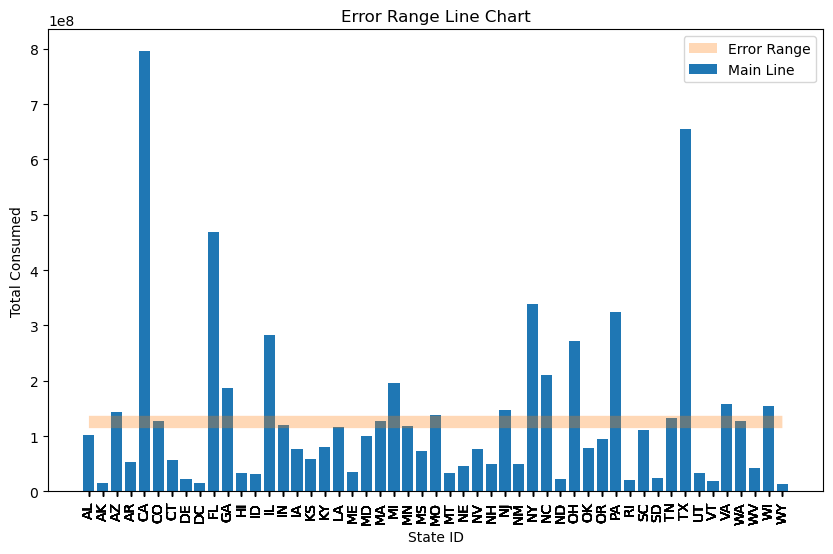

In [10]:
plt.figure(figsize=(50,20))

# Extract columns for X-axis, Y-axis, and error range bounds
x_values = data['state_id']  # Replace 'X-axis' with the actual column name for X-axis data
y_values = data['niaaa_total_beer_vol_consumed_gallons']  # Replace 'Y-axis' with the actual column name for Y-axis data
lower_bound = data['Lower Bound']  # Replace 'Lower Bound' with the actual column name for lower bound data
upper_bound = data['Upper Bound']  # Replace 'Upper Bound' with the actual column name for upper bound data

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, label='Main Line')
plt.fill_between(x_values, lower_bound, upper_bound, alpha=0.3, label='Error Range')

# Customize labels and title
plt.xlabel('State ID')
plt.ylabel('Total Consumed')
plt.xticks(x_values, rotation='vertical')
plt.title('Error Range Line Chart')
plt.legend()

# Show the plot
plt.show()
                 